## Intall packages

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import time
sns.set()

In [3]:
%pip install kaggle
%pip install jupyter 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load Dataset

In [4]:
#load the data directly from Kaggle later


In [5]:
#Load data from local folder (Mac):

action_movie = pd.read_csv('/Users/zdycho/Downloads/archive/action.csv')
crime_movie = pd.read_csv('/Users/zdycho/Downloads/archive/crime.csv')
adventure_movie = pd.read_csv('/Users/zdycho/Downloads/archive/adventure.csv')
thriller_movie = pd.read_csv('/Users/zdycho/Downloads/archive/thriller.csv')
family_movie = pd.read_csv('/Users/zdycho/Downloads/archive/family.csv')
mystery_movie = pd.read_csv('/Users/zdycho/Downloads/archive/mystery.csv')
scifi_movie = pd.read_csv('/Users/zdycho/Downloads/archive/scifi.csv')
history_movie = pd.read_csv('/Users/zdycho/Downloads/archive/history.csv')
sports_movie = pd.read_csv('/Users/zdycho/Downloads/archive/sports.csv')
animation_movie = pd.read_csv('/Users/zdycho/Downloads/archive/animation.csv')
war_movie = pd.read_csv('/Users/zdycho/Downloads/archive/war.csv')
biography_movie = pd.read_csv('/Users/zdycho/Downloads/archive/biography.csv')
horror_movie = pd.read_csv('/Users/zdycho/Downloads/archive/horror.csv')
fantasy_movie = pd.read_csv('/Users/zdycho/Downloads/archive/fantasy.csv')
romance_movie = pd.read_csv('/Users/zdycho/Downloads/archive/romance.csv')
film_noir_movie = pd.read_csv('/Users/zdycho/Downloads/archive/film-noir.csv')

In [6]:
# Add genre column to each dataframe
action_movie['primary_genre'] = 'Action'
crime_movie['primary_genre'] = 'Crime'
adventure_movie['primary_genre'] = 'Adventure'
thriller_movie['primary_genre'] = 'Thriller'
family_movie['primary_genre'] = 'Family'
mystery_movie['primary_genre'] = 'Mystery'
scifi_movie['primary_genre'] = 'Sci-Fi'
history_movie['primary_genre'] = 'History'
sports_movie['primary_genre'] = 'Sports'
animation_movie['primary_genre'] = 'Animation'
war_movie['primary_genre'] = 'War'
biography_movie['primary_genre'] = 'Biography'
horror_movie['primary_genre'] = 'Horror'
fantasy_movie['primary_genre'] = 'Fantasy'
romance_movie['primary_genre'] = 'Romance'
film_noir_movie['primary_genre'] = 'Film-Noir'

In [7]:
# Concatenate all dataframes
df = pd.concat([action_movie, crime_movie, adventure_movie, thriller_movie,
                family_movie, mystery_movie, scifi_movie, history_movie,
                sports_movie, animation_movie, war_movie, biography_movie,
                horror_movie, fantasy_movie, romance_movie, film_noir_movie])

# Reset index
df = df.reset_index(drop=True)

# Preview the dataframe
df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN,Action
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN,Action
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN,Action
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368295,tt0032257,Black Diamonds,1940,NaN,60 min,"Crime, Drama, Film-Noir",5.5,A reporter on a visit to his hometown hears of...,Christy Cabanne,/name/nm0127511/,"Richard Arlen, \nAndy Devine, \nKathryn Adams,...","/name/nm0035159/,/name/nm0222596/,/name/nm0011...",33.0,NaN,Film-Noir
368296,tt0027668,The Gentleman from Louisiana,1936,NaN,67 min,"Crime, Drama, Film-Noir",4.5,"In Victorian-era USA, a horse-jockey becomes a...",Irving Pichel,/name/nm0681635/,"Eddie Quillan, \nCharles 'Chic' Sale, \nCharlo...","/name/nm0703600/,/name/nm0757925/,/name/nm0377...",21.0,NaN,Film-Noir
368297,tt0047929,El cerco,1955,NaN,77 min,"Crime, Film-Noir",6.2,A group of robbers assault a factory in the po...,Miguel Iglesias,/name/nm0407071/,"José Guardiola, \nIsabel de Castro, \nÁngel Jo...","/name/nm0345348/,/name/nm0207894/,/name/nm0430...",46.0,NaN,Film-Noir
368298,tt0033161,Three Silent Men,1940,NaN,72 min,"Crime, Drama, Film-Noir",5.0,Foreign scientist is selling a secret weapon t...,Thomas Bentley,/name/nm0072872/,"Sebastian Shaw, \nDerrick De Marney, \nPatrici...","/name/nm0789970/,/name/nm0210116/,/name/nm0733...",79.0,NaN,Film-Noir


## Align columns and delete NaN values

In [8]:
#change "genre" column to "secondary_genre":
df.rename(columns = {'genre':'secondary_genre'}, inplace = True)

In [9]:
#delete "genre" from "secondary_genre" column:

#create function:
def remove_primary_genre(row):
    primary_genre = row['primary_genre']
    secondary_genres = row['secondary_genre']

    # Check if primary_genre is in the secondary_genres
    if primary_genre in secondary_genres:
        # Replace primary genre and any adjacent commas
        # Use strip to remove leading/trailing whitespace and commas
        new_secondary = secondary_genres.replace(primary_genre, '').replace(',,', ',').strip(', ')
    else:
        new_secondary = secondary_genres

    return new_secondary

#apply the function to each row:
df['secondary_genre'] = df.apply(remove_primary_genre, axis=1)


In [10]:
#delete NaN values from "gross(in $)" column: 
df = df[df['gross(in $)'].notna()]


In [11]:
#Delete redundant columns; "star_id" and "director_id":
#df = df.drop(['star_id', 'director_id'], axis=1) 

# fuck this shit because obviously we need the IDs ^^

In [13]:
df['star'].unique()

array(["Chadwick Boseman, \nMichael B. Jordan, \nLupita Nyong'o, \nDanai Gurira",
       'Tom Cruise, \nTim Robbins, \nKelly McGillis, \nVal Kilmer',
       'Sam Worthington, \nZoe Saldana, \nSigourney Weaver, \nMichelle Rodriguez',
       ...,
       'Kirk Douglas, \nJan Sterling, \nRobert Arthur, \nPorter Hall',
       'Ray Milland, \nJane Wyman, \nPhillip Terry, \nHoward Da Silva',
       'Paulette Goddard, \nWilliam Bishop, \nJohn Ireland, \nOskar Homolka'],
      dtype=object)

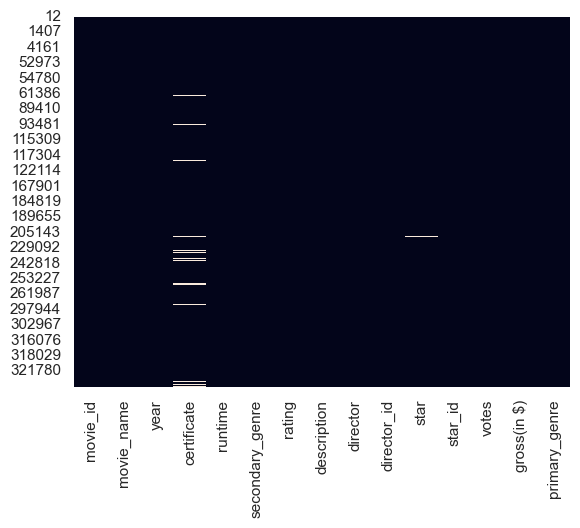

movie_id              0
movie_name            0
year                  0
certificate        1131
runtime              12
secondary_genre       0
rating                0
description           0
director              2
director_id           2
star                  9
star_id               2
votes                 0
gross(in $)           0
primary_genre         0
dtype: int64


In [14]:
#inspect columns for NaN values:
import seaborn as sns
import matplotlib.pyplot as plt

#heatmap to visualize NaN values in the DataFrame
sns.heatmap(df.isna(), cbar=False)
plt.show()

#print values:
nan_counts = df.isna().sum()
print(nan_counts)

In [20]:
#calculate sum of column "gross(in $) where column "certificate" has NaN values: 
cer_nan_sum_of_gross = df.loc[df['certificate'].isna(), 'gross(in $)'].sum()
run_nan_sum_of_gross = df.loc[df['runtime'].isna(), 'gross(in $)'].sum()
dir_nan_sum_of_gross = df.loc[df['director'].isna(), 'gross(in $)'].sum()
sta_nan_sum_of_gross = df.loc[df['star'].isna(), 'gross(in $)'].sum()
print(cer_nan_sum_of_gross, run_nan_sum_of_gross, dir_nan_sum_of_gross, sta_nan_sum_of_gross)

1517762297.0 11166623.0 2071206.0 3663512.0


In [36]:
#divide cer_nan_sum_of_gross, run_nan_sum_of_gross, dir_nan_sum_of_gross, sta_nan_sum_of_gross with total sum of gross (in $):
total_gross = df['gross(in $)'].sum()

nan_gross_percent = ((
    cer_nan_sum_of_gross + 
    run_nan_sum_of_gross + 
    dir_nan_sum_of_gross + 
    sta_nan_sum_of_gross)/ 
    total_gross) 

print(f"Percentage of gross (in $) for NaN values: {nan_gross_percent:.2%}")

Percentage of gross (in $) for NaN values: 0.21%


In [44]:
##Because the remaining NaN values make up a small portion of the movie gross, we can safely drop these rows.

#delete NaN values from columns "certificate", "runtime", "director", "star": 
df = df.dropna(subset=['certificate', 'runtime', 'director', 'star'])

In [12]:
#inspect "star" column: 
df['star'].value_counts()

William Shatner, \nLeonard Nimoy, \nDeForest Kelley, \nJames Doohan       21
Aoi Yûki, \nChiwa Saitô, \nEri Kitamura, \nKaori Mizuhashi                12
Patrick Stewart, \nJonathan Frakes, \nBrent Spiner, \nLeVar Burton        12
Adam Sandler, \nAndy Samberg, \nSelena Gomez, \nKevin James               10
Mike Myers, \nCameron Diaz, \nEddie Murphy, \nAntonio Banderas            10
                                                                          ..
Lucas Black, \nRobert Duvall, \nMelissa Leo, \nDeborah Ann Woll            1
James Woods, \nLouis Gossett Jr., \nBruce Dern, \nOliver Platt             1
William Tepper, \nKaren Black, \nMichael Margotta, \nBruce Dern            1
Scott Bakula, \nCorbin Bernsen, \nDennis Haysbert, \nTakaaki Ishibashi     1
Paulette Goddard, \nWilliam Bishop, \nJohn Ireland, \nOskar Homolka        1
Name: star, Length: 11987, dtype: int64

In [50]:
#inspect "star":
shortest_star = df.loc[df['star'].str.len().idxmin(), 'star']
longest_star = df.loc[df['star'].str.len().idxmax(), 'star']
print(shortest_star)
print(longest_star)
print(df['star'].str.len().max())


John Kerry
Dariel Arrechaga, 
Anailín de la Rúa de la Torre, 
Javier Núñez Florián, 
María Adelaida Méndez Bonet
101


In [56]:
#add a "actor_count" column:
df['actor_count'] = df['star'].str.split(',').apply(len)

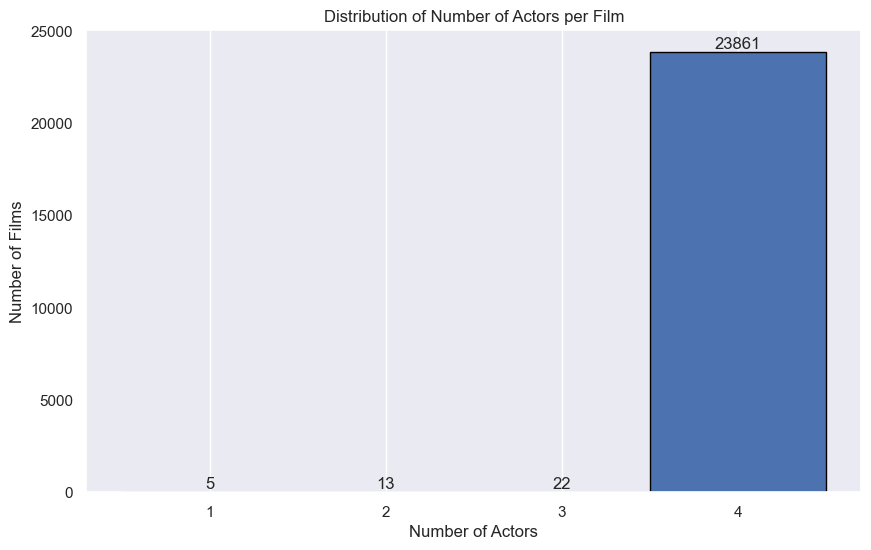

In [60]:
#print histogram for distribution of "star" column:
plt.figure(figsize=(10, 6))
ax = df['actor_count'].plot(kind='hist', bins=range(1, df['actor_count'].max() + 2), edgecolor='black', align='left')
plt.title('Distribution of Number of Actors per Film')
plt.xlabel('Number of Actors')
plt.ylabel('Number of Films')
plt.xticks(range(1, df['actor_count'].max() + 1))
plt.grid(axis='y')
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

In [64]:
# Print the sum of "gross (in $)" for rows with "actor_count" of 1, 2, and 3:
print(df.loc[df['actor_count'].isin([1, 2, 3]), 'gross(in $)'].sum())

134636154.0


In [65]:
#print the full list of movies with "actor_count" of 1, 2 and 3:
df.loc[df['actor_count'].isin([1, 2, 3])]

,movie_id,movie_name,year,certificate,runtime,secondary_genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre,actor_count
1395,tt4218696,The Wall,2017,R,88 min,"Drama, Thriller",6.2,Two American Soldiers are trapped by a lethal ...,Doug Liman,/name/nm0510731/,"Aaron Taylor-Johnson, \nJohn Cena, \nLaith Nakli","/name/nm1093951/,/name/nm1078479/,/name/nm1821...",28111.0,1803064.0,Action,3
1588,tt2017038,All Is Lost,2013,PG-13,106 min,"Adventure, Drama",6.9,After a collision with a shipping container at...,J.C. Chandor,/name/nm1170855/,Robert Redford,/name/nm0000602/,81460.0,6263670.0,Action,1
22555,tt7935892,The Oscar Nominated Short Films 2018: Live Action,2018,R,96 min,Drama,8.0,Collective screening of the Academy Award nomi...,Max Porter,/name/nm11475835/,"Kobe Bryant, \nTarra Riggs","/name/nm1101483/,/name/nm2743985/",209.0,3508777.0,Action,2
52785,tt4218572,Widows,2018,R,129 min,"Drama, Thriller",6.8,Four women with nothing in common except a deb...,Steve McQueen,/name/nm2588606/,"Viola Davis, \nMichelle Rodriguez, \nElizabeth...","/name/nm0205626/,/name/nm0735442/,/name/nm4456...",99698.0,42402632.0,Crime,3
54240,tt1379177,The Disappearance of Alice Creed,2009,R,100 min,Thriller,6.7,A rich man's daughter is held captive in an ab...,J Blakeson,/name/nm2128335/,"Gemma Arterton, \nEddie Marsan, \nMartin Compston","/name/nm2605345/,/name/nm0550371/,/name/nm1161...",26941.0,166980.0,Crime,3
88338,tt6820256,Arctic,2018,PG-13,98 min,Drama,6.8,A man stranded in the Arctic after a plane cra...,Joe Penna,/name/nm1020835/,"Mads Mikkelsen, \nMaria Thelma Smáradóttir, \n...","/name/nm0586568/,/name/nm5386550/,/name/nm1044...",54313.0,2410795.0,Adventure,3
89553,tt2017038,All Is Lost,2013,PG-13,106 min,"Action, , Drama",6.9,After a collision with a shipping container at...,J.C. Chandor,/name/nm1170855/,Robert Redford,/name/nm0000602/,81460.0,6263670.0,Adventure,1
90368,tt0302674,Gerry,2002,R,103 min,"Drama, Mystery",6.0,A friendship between two young men is tested w...,Gus Van Sant,/name/nm0001814/,"Casey Affleck, \nMatt Damon","/name/nm0000729/,/name/nm0000354/",19091.0,236266.0,Adventure,2
96799,tt2401023,Jack London's Love of Life,2012,Not Rated,87 min,"Drama, History",8.3,"Jack, an Alaska gold rush era miner, is abando...",Kevin Swigert,/name/nm0842642/,"Pete Ammel, \nPhebe Horschel","/name/nm4199362/,/name/nm5052384/",814.0,44000.0,Adventure,2
97150,tt0067863,Toklat,1971,G,90 min,"Drama, Family",8.1,A poor old mountain man returns to the wild Or...,Robert W. Davison,/name/nm0203472/,"Leon Ames, \nDick Robinson, \nJoel S. Howes","/name/nm0000748/,/name/nm0732555/,/name/nm1032...",16.0,37500.0,Adventure,3


In [17]:
#print a list of rows that have NaN value in "certificate", and sort it in descending order based on "gross(in $)" column:
df[df['certificate'].isna()].sort_values(by='gross(in $)', ascending=False)



,movie_id,movie_name,year,certificate,runtime,secondary_genre,rating,description,director,director_id,star,star_id,votes,gross(in $),primary_genre
229158,tt0265662,The Rookie,2002,NaN,127 min,"Drama, Family, Sport",6.9,A Texas baseball coach makes the major league ...,John Lee Hancock,/name/nm0359387/,"Dennis Quaid, \nJD Evermore, \nRachel Griffith...","/name/nm0000598/,/name/nm0263625/,/name/nm0341...",35516.0,75600072.0,Sports
301401,tt0163862,T-Rex: Back to the Cretaceous,1998,NaN,45 min,"Adventure, Family",4.8,A youth who finds a dinosaur egg accidentally ...,Brett Leonard,/name/nm0502577/,"Peter Horton, \nLiz Stauber, \nKari Coleman, \...","/name/nm0005022/,/name/nm0005459/,/name/nm0171...",778.0,53346750.0,Fantasy
93712,tt0163862,T-Rex: Back to the Cretaceous,1998,NaN,45 min,"Family, Fantasy",4.8,A youth who finds a dinosaur egg accidentally ...,Brett Leonard,/name/nm0502577/,"Peter Horton, \nLiz Stauber, \nKari Coleman, \...","/name/nm0005022/,/name/nm0005459/,/name/nm0171...",778.0,53346750.0,Adventure
170420,tt0163862,T-Rex: Back to the Cretaceous,1998,NaN,45 min,"Adventure, , Fantasy",4.8,A youth who finds a dinosaur egg accidentally ...,Brett Leonard,/name/nm0502577/,"Peter Horton, \nLiz Stauber, \nKari Coleman, \...","/name/nm0005022/,/name/nm0005459/,/name/nm0171...",778.0,53346750.0,Family
229396,tt0079510,The Main Event,1979,NaN,112 min,"Comedy, Romance, Sport",5.5,A bankrupt entrepreneur attempts to recoup som...,Howard Zieff,/name/nm0956052/,"Barbra Streisand, \nRyan O'Neal, \nPaul Sand, ...","/name/nm0000659/,/name/nm0641939/,/name/nm0761...",3005.0,42800000.0,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362080,tt2190469,True Love Zombie,2012,NaN,86 min,"Comedy, Horror",4.4,"Rhonda and Paul are a loving married couple, b...",Paul Blevins,/name/nm4860140/,"Paul Blevins, \nRhonda Blevins, \nSteve Snyder...","/name/nm4860140/,/name/nm4860569/,/name/nm4860...",46.0,100.0,Romance
230899,tt1748280,Veer!,2012,NaN,87 min,"Comedy, Drama, Romance",7.7,Jesse Sorensen ruled Florida as a pro skateboa...,Patrick Barry,/name/nm2741686/,"Jesse Gay, \nErin Cline, \nJames Nguyen, \nCor...","/name/nm4204320/,/name/nm1599810/,/name/nm3099...",80.0,85.0,Sports
289735,tt13238490,Tee em el,2020,NaN,102 min,,4.7,"'TEE EM EL' is about 'warfare, the kingdom of ...",Pereko Mosia,/name/nm11855913/,"Siyabonga Mabaso, \nLuyanda Mabote, \nReithole...","/name/nm11975421/,/name/nm11975436/,/name/nm11...",10.0,20.0,Horror
125599,tt4730638,By Light of Desert Night,2019,NaN,94 min,"Drama, Mystery",4.3,Three best friends head on a road trip into th...,David Stuart Snell,/name/nm5096896/,"Meghan Carrasquillo, \nLara Pictet, \nAlexandr...","/name/nm8010608/,/name/nm4568278/,/name/nm7329...",1100.0,1.0,Thriller
